# Part 4: CLASSIFICATION USING FULL BAYESIAN + PREDICTIVE DISTRIBUTION

## 1.This is an example code to generate classification data of two classes

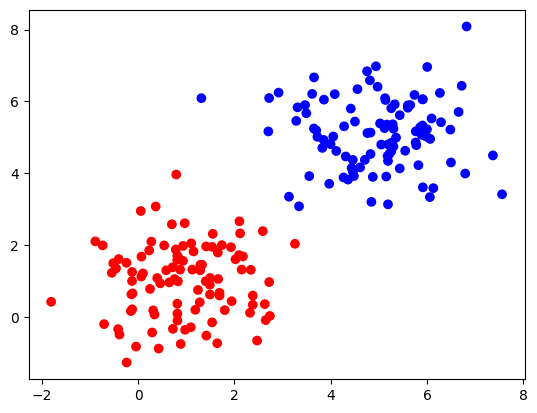

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

N1 = 100
N2 = 100
K = 2
sigma = 1.0

mean = (1, 1)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

X = np.concatenate((X1, X2))
color = np.concatenate((c1, c2))

T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N1 and n<len(X1)+len(X2)):
        T[n][1] = 1
T = T.astype(int)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

## 2.Based on the code above, generate data similar to:

X = [[3.02935918 3.42786791]
 [2.83254501 2.95764975]
 [2.92810932 3.45150161]
 [2.77349245 2.54996397]
 [2.73141551 2.80239666]
 [3.33622749 2.86105533]
 [2.97609246 3.10147089]
 [3.3571797  2.93135968]
 [3.00469685 2.49062474]
 [2.19400816 3.13910457]
 [2.87584423 2.72819253]
 [3.48763193 2.89986797]
 [3.08584665 2.99280931]
 [3.19303391 3.66681009]
 [3.1252514  3.55209292]
 [2.71381622 3.34316682]
 [3.16820537 3.17874624]
 [2.85651153 3.29767575]
 [3.12874451 3.08444439]
 [2.92128908 2.78878067]
 [3.44359124 3.7187849 ]
 [2.05832146 3.1487676 ]
 [3.15536127 2.77299162]
 [2.79922269 2.90474846]
 [2.93950206 3.26737434]
 [3.21425942 2.57565122]
 [2.87677975 3.00189004]
 [3.63858985 2.79436112]
 [3.25581422 3.39406179]
 [3.19932651 2.89899441]
 [2.40156132 3.21038122]
 [3.09482581 3.14374558]
 [3.34243313 2.73715926]
 [2.63947783 3.25082407]
 [2.99024832 3.11186788]
 [2.67019302 3.14614241]
 [2.8478243  2.4103065 ]
 [3.21662863 2.42408357]
 [3.31436409 3.3060295 ]
 [2.93675835 3.163747

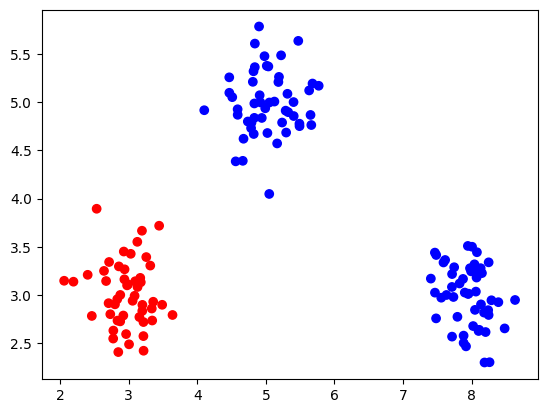

In [5]:
#delete all variables
%reset -f

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import linalg

point_num = 50
N1 = point_num
N2 = point_num
N3 = point_num
K = 2
sigma = 0.1

mean = (3, 3)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N1)
c1 = ['red'] * len(X1)

mean = (5, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N2)
c2 = ['blue'] * len(X2)

mean = (8, 3)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N3)
c3 = ['blue'] * len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

T = 0 * np.ones([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N1 and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
        
T = T.astype(int)
print('X =',X)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

## 3.Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2. Based in the generated data and your implementation, compute the probability map:

vy [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0

vy [[9.33775571e-04]
 [4.00398904e-04]
 [8.54687397e-04]
 [3.81552808e-04]
 [3.68829408e-04]
 [6.36955347e-04]
 [5.01369694e-04]
 [7.09055686e-04]
 [4.17716238e-04]
 [5.70414339e-04]
 [3.75810308e-04]
 [8.93902091e-04]
 [5.00272785e-04]
 [2.49930067e-03]
 [1.51458918e-03]
 [5.86864700e-04]
 [7.16104621e-04]
 [5.94856684e-04]
 [5.86575986e-04]
 [3.86715935e-04]
 [6.46499616e-03]
 [6.74801058e-04]
 [4.65801213e-04]
 [3.84624702e-04]
 [6.10799230e-04]
 [4.83785659e-04]
 [4.22030198e-04]
 [1.13314229e-03]
 [1.32637504e-03]
 [5.31132344e-04]
 [5.10891671e-04]
 [6.07570295e-04]
 [5.92326502e-04]
 [5.05106195e-04]
 [5.14718978e-04]
 [4.49769031e-04]
 [4.15351879e-04]
 [5.07977248e-04]
 [1.22809372e-03]
 [5.22794550e-04]
 [6.75218116e-04]
 [4.90849000e-04]
 [5.06662031e-04]
 [4.63142246e-04]
 [3.81548334e-04]
 [3.99384186e-04]
 [1.78917895e-03]
 [3.71481285e-04]
 [3.71547611e-04]
 [3.93940598e-04]
 [9.99999967e-01]
 [1.00000000e+00]
 [9.99999996e-01]
 [9.99416918e-01]
 [9.99391486e-01]
 [1.000

vy [[9.33775571e-04]
 [4.00398904e-04]
 [8.54687397e-04]
 [3.81552808e-04]
 [3.68829408e-04]
 [6.36955347e-04]
 [5.01369694e-04]
 [7.09055686e-04]
 [4.17716238e-04]
 [5.70414339e-04]
 [3.75810308e-04]
 [8.93902091e-04]
 [5.00272785e-04]
 [2.49930067e-03]
 [1.51458918e-03]
 [5.86864700e-04]
 [7.16104621e-04]
 [5.94856684e-04]
 [5.86575986e-04]
 [3.86715935e-04]
 [6.46499616e-03]
 [6.74801058e-04]
 [4.65801213e-04]
 [3.84624702e-04]
 [6.10799230e-04]
 [4.83785659e-04]
 [4.22030198e-04]
 [1.13314229e-03]
 [1.32637504e-03]
 [5.31132344e-04]
 [5.10891671e-04]
 [6.07570295e-04]
 [5.92326502e-04]
 [5.05106195e-04]
 [5.14718978e-04]
 [4.49769031e-04]
 [4.15351879e-04]
 [5.07977248e-04]
 [1.22809372e-03]
 [5.22794550e-04]
 [6.75218116e-04]
 [4.90849000e-04]
 [5.06662031e-04]
 [4.63142246e-04]
 [3.81548334e-04]
 [3.99384186e-04]
 [1.78917895e-03]
 [3.71481285e-04]
 [3.71547611e-04]
 [3.93940598e-04]
 [9.99999967e-01]
 [1.00000000e+00]
 [9.99999996e-01]
 [9.99416918e-01]
 [9.99391486e-01]
 [1.000

 [9.27973614e-01]]
vy [[9.33775571e-04]
 [4.00398904e-04]
 [8.54687397e-04]
 [3.81552808e-04]
 [3.68829408e-04]
 [6.36955347e-04]
 [5.01369694e-04]
 [7.09055686e-04]
 [4.17716238e-04]
 [5.70414339e-04]
 [3.75810308e-04]
 [8.93902091e-04]
 [5.00272785e-04]
 [2.49930067e-03]
 [1.51458918e-03]
 [5.86864700e-04]
 [7.16104621e-04]
 [5.94856684e-04]
 [5.86575986e-04]
 [3.86715935e-04]
 [6.46499616e-03]
 [6.74801058e-04]
 [4.65801213e-04]
 [3.84624702e-04]
 [6.10799230e-04]
 [4.83785659e-04]
 [4.22030198e-04]
 [1.13314229e-03]
 [1.32637504e-03]
 [5.31132344e-04]
 [5.10891671e-04]
 [6.07570295e-04]
 [5.92326502e-04]
 [5.05106195e-04]
 [5.14718978e-04]
 [4.49769031e-04]
 [4.15351879e-04]
 [5.07977248e-04]
 [1.22809372e-03]
 [5.22794550e-04]
 [6.75218116e-04]
 [4.90849000e-04]
 [5.06662031e-04]
 [4.63142246e-04]
 [3.81548334e-04]
 [3.99384186e-04]
 [1.78917895e-03]
 [3.71481285e-04]
 [3.71547611e-04]
 [3.93940598e-04]
 [9.99999967e-01]
 [1.00000000e+00]
 [9.99999996e-01]
 [9.99416918e-01]
 [9.99

xx = [[0.  0.  0.  ... 0.  0.  0. ]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.2 0.2 0.2 ... 0.2 0.2 0.2]
 ...
 [9.7 9.7 9.7 ... 9.7 9.7 9.7]
 [9.8 9.8 9.8 ... 9.8 9.8 9.8]
 [9.9 9.9 9.9 ... 9.9 9.9 9.9]]
yy = [[0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 ...
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]
 [0.  0.1 0.2 ... 9.7 9.8 9.9]]
plane = [[0.02067493 0.019801   0.01907041 ... 0.509746   0.50928846 0.50880343]
 [0.019801   0.01888692 0.01811224 ... 0.51183665 0.51124671 0.51063118]
 [0.01907041 0.01811224 0.01729078 ... 0.51429589 0.51354743 0.51277623]
 ...
 [0.509746   0.51183665 0.51429589 ... 0.98744629 0.98272899 0.97661909]
 [0.50928846 0.51124671 0.51354743 ... 0.98272899 0.97683146 0.96938941]
 [0.50880343 0.51063118 0.51277623 ... 0.97661909 0.96938941 0.96049464]]


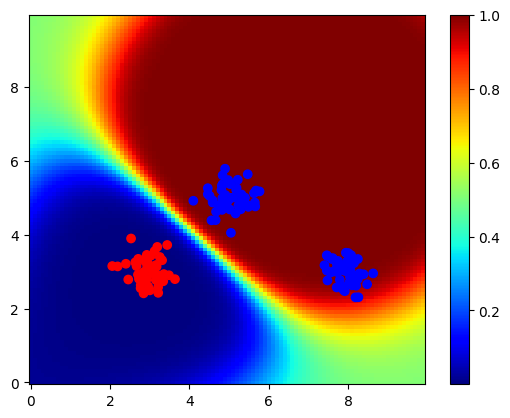

In [7]:
def Gaussian_basis_Func_2D(x, mu, s):
    G = np.exp(-((x[0] - mu) ** 2+(x[1] - mu) ** 2) / (2 * s ** 2))
    return G

def get_sigmoid(a):
    sigmoid = 1 / (1 + np.exp(-a))
    return sigmoid

def bayesian_classify(X, T, M, alpha):
    N = len(X)
    Phi = np.zeros([N, M])
    t = np.zeros([N, 1])
    w = np.zeros([M, 1])
    vy = np.zeros([N, 1])
    R = np.zeros([N, N])
    s0 = alpha * np.identity(M) 
    for n in range(N):
        for m in range(M):
            mu = 10 * m / M
            Phi[n][m] = np.exp(-(np.power((X[n][0] - mu), 2) + np.power((X[n][1]-mu), 2))/2/4)
        t[n][0] = T[n][1]
        
    for n in range(0, 100):
        for i in range(0, N):
            vy[i][0] = get_sigmoid(np.dot(w.T, Phi[i, :]))
            R[i][i] = vy[i][0] * (1 - vy[i][0])
        gE = np.dot(alpha * np.identity(M), w) + np.dot(Phi.T, vy - t)
        H = s0 + np.dot(np.dot(Phi.T, R), Phi)
        S = linalg.inv(H)
        w = w - np.dot(S, gE)
        
    return w, H

def pred_classify(w, x, H):
    phi = np.zeros([M, 1])
    for m in range(M):
        mu = 10 * m / M
        phi[m][0] = np.exp(-(np.power((x[0]-mu), 2) + np.power((x[1]-mu), 2))/2/4)
    
    mu_a = np.dot(w.T, phi)
    garma_a2 = np.dot(np.dot(phi.T, H), phi)
    k_a = np.power((1 + math.pi / 8 * garma_a2), 0.5) 
    p = get_sigmoid( mu_a / k_a)
    return p
    
#===============================================

s = 0.5
M = 3
alpha = 0.001
x_size = 10
y_size = 10
num = 10
plane = np.zeros([num * x_size, num * y_size])
xx = np.zeros([num * x_size, num * x_size])
yy = np.zeros([num * y_size, num * y_size])

w_new, H = bayesian_classify(X, T, M, alpha)

for n in range(0, num * x_size):
    for m in range(0, num * y_size):
        x = [n / num, m / num]
        xx[n][m] = n / num
        yy[n][m] = m / num
        p = pred_classify(w_new, x, H)
        plane[n][m] = p

print('xx =',xx)
print('yy =',yy)
print('plane =',plane)
fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.pcolormesh(xx,yy,plane,cmap='jet')
fig.colorbar(c)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

## 4.Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.


In [6]:
x = np.zeros([2, 1])
print('Input your x')
x[0] = input('input x axis:')
x[1] = input('input y axis:')

Input your x
input x axis:6
input y axis:8


In [7]:
p_new = pred_classify(w_new, x, H)
if p_new < 0.5:
    print('It belongs to C1!')
else:
    print('It belongs to C2!')
print('uncertainty p_new is', p_new)

It belongs to C2!
uncertainty p_new is [[1.]]
